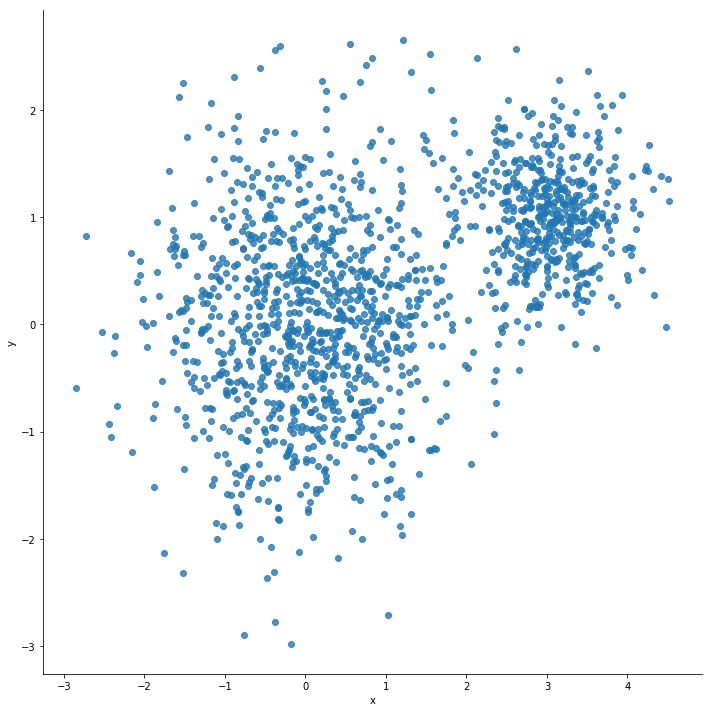

In [11]:
# python3
# ysoftman - tensorflow 를 이용해서 k-menas-clustering 구현하기
# 소스 출처 https://github.com/rickiepark/tfk-notebooks/blob/master/first-contact-with-tensorflow/chapter3_kmeans.py.ipynb
# 원소스가 python2 기반이라 python3 에 맞게 수정하고, 기타 데이터 값들도 변경해봄
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sb
import tensorflow as tf


# k=3개로 하는 클러스링
num_clusters = 5
num_steps = 100


vector_values = []
# 1000개의 랜덤값 생성
for i in range(1000):  
#   x --> 평균:0.0 표준편차:0.6  y --> 평균:0.0 표준편차 0.9 의 랜덤
    vector_values.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
# 500개의 랜덥값 생성
for i in range(500):
#   x --> 평균:3.0 표준편차:0.5  y --> 평균:1.0 표준편차 0.5 의 랜덤
    vector_values.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

# 위에서 생성한 2차원 배열 x,y 를 dataframe 으로 설정
df = pd.DataFrame({"x": [v[0] for v in vector_values], "y": [v[1] for v in vector_values]})
# dataframe 의 랜덤 데이터들을 그래프로 출력
sb.lmplot("x", "y", data=df, fit_reg=False, size=10)
plt.pyplot.show()


In [12]:
# 위 2차원의 랜럼값을 상수로하는 새로운 벡터(클러스터링 할 데이터들) 생성
vectors = tf.constant(vector_values)
# 클러스터링의 중심점(centroid) num_clusters 개를 랜덤하게 설정
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0, 0], [num_clusters, -1]))
# vectors 0번째 차원으로 확장(설정)한다. 차원 확장시 0부터 시작해야 한다.
expanded_vectors = tf.expand_dims(vectors, 0)
# centroids 1번째 차원으로 설정
expanded_centroids = tf.expand_dims(centroids, 1)

print(expanded_vectors.get_shape())
print(expanded_centroids.get_shape())


(1, 1500, 2)
(5, 1, 2)


In [13]:
# 랜덤 데이터들을 5개의 centroids 와 거리( (expanded_vectors-expanded_centroids)의 제곱에 루트를 씌워 계산 )를 구한다.
distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
# 계산된 거리들 중 가장 작은 값의 인덱스 (1차원 배열에 0차원으로 0차원에에 적용)
assignments = tf.argmin(distances, 0)

# 클러스터링된 데이터들내에서 새로운 centroid 를 구한다.
means = tf.concat([
    tf.reduce_mean(
        tf.gather(vectors,
                  tf.reshape(
                      tf.where(tf.equal(assignments, c)
                      ), [1, -1])
                  ), reduction_indices=[1])
    for c in range(num_clusters)], 0)
# 새로 계산된 centorids 들로 업데이트
update_centroids = tf.assign(centroids, means)


# tensor flow 를 구성하는 변수들 모두 초기화
init_op = tf.initialize_all_variables()
# 세션(tensor 가 flow 될 수 있도록 준비) 생성
sess = tf.Session()
# 실행(tensor 가 flow 된다.)
sess.run(init_op)

# num_steps 만큼 반복하여 centroids 를 계사한다.
for step in range(num_steps):
#     centorid 계산을 시작(설정된 tensor 들을 flow 하도록 한다.)
    _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])

# 최종적으로 확정된 num_clusters 개의 centroids 좌표 출력
print("centroids")
print(centroid_values)


centroids
[[-0.9701001   0.45145753]
 [ 0.6230492   0.41813362]
 [-0.03482018 -0.9700398 ]
 [ 3.242971    0.83375406]
 [ 2.4875813   1.3710829 ]]


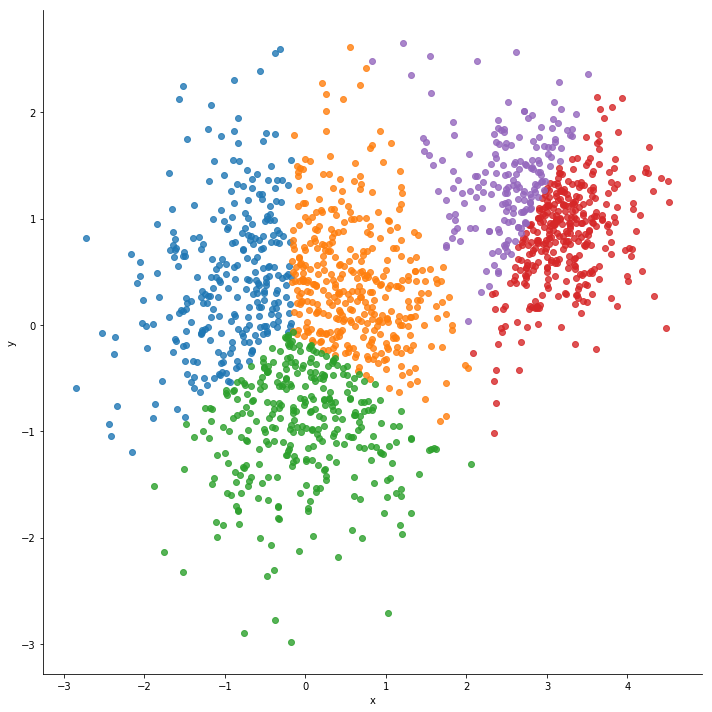

In [14]:
# 그래프로 표현될 데이터 구성
data = {"x": [], "y": [], "cluster": []}
# x, y -> 랜덤데이터 값, cluster -> 랜덥데이터값들 각각이 어떤 클러스터로 할당되었는지 나타내는 값
for i in range(len(assignment_values)):
    data["x"].append(vector_values[i][0])
    data["y"].append(vector_values[i][1])
    data["cluster"].append(assignment_values[i])
    
# dataframe 의 랜덤 데이터들을 그래프로 출력
df = pd.DataFrame(data)
sb.lmplot("x", "y", data=df, fit_reg=False, size=10, hue="cluster", legend=False)
plt.pyplot.show()